**INTRODUCTION**

---



**[CLICK HERE](https://colab.research.google.com/drive/1Pgm8nz5kVPGuKP4ZV6NhP63Qz-hzNXS1?usp=sharing) for the same work on Google Colab.**

Dataset used in this analysis contains 12,756 survey responses with 23 attributes describing how we live our lives. Most attribute names are self-explanatory, but to find the specific questions asked for each attribute one can go to the survey form itself.

Here is the link to the survey :
http://www.authentic-happiness.com/your-life-satisfaction-score

Following 6 relationships will be looked into from the data:-
1. BMI & DAILY INTAKE OF FRUITS AND VEGETABLES.
2. BMI & DAILY STEPS WALKED
3. DAILY STRESS & DAILY MEDITATION
4. DAILY STRESS & SOCIAL NETWORK
5. DAILY STRESS & SLEEPING HOURS
6. SUFFICIENCY OF INCOME & DAILY TIME SPENT ON PASSION

***Please note that this is just an Exploratory Analysis. So any correlation/relationship found here can not be taken as anything other than merely "informative" or "interesting". These can not be considered causal as the data is observational. For determining causation, we need Randomised Control Trials, with proper methodology defined in advance of data collection.***

**FETCHING & CLEANING THE DATA**

---



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/Anshuman-Tripathi/Data-Explainers-and-Projects/master/EDA_on_Well_Being_Data/Wellbeing_and_lifestyle_data.csv'
df = pd.read_csv(url)
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION,AGE,GENDER
0,07-07-15,3.0,2,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,36 to 50,Female
1,07-07-15,2.0,3,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,36 to 50,Female
2,07-07-15,2.0,3,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3,36 to 50,Female
3,07-07-15,3.0,3,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0,51 or more,Female
4,07-07-15,5.0,1,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,51 or more,Female


The BMI_RANGE column needs to have its values changed from *1* and *2* to *Below 25* and *Above 25*, respectively.

The SUFFICIENT_INCOME column needs to have its values from *1* and *2* to *Not Sufficient* and *Sufficient*, respectivley.

In [ ]:
# Replacing values
df['BMI_RANGE'].replace(1,'Below 25',inplace=True)
df['BMI_RANGE'].replace(2,'Above 25',inplace=True)
df['SUFFICIENT_INCOME'].replace(1,'Not Sufficient',inplace=True)
df['SUFFICIENT_INCOME'].replace(2,'Sufficient',inplace=True)
df.loc[0:5,('BMI_RANGE','SUFFICIENT_INCOME')]

,BMI_RANGE,SUFFICIENT_INCOME
0,Below 25,Not Sufficient
1,Above 25,Sufficient
2,Above 25,Sufficient
3,Above 25,Not Sufficient
4,Above 25,Sufficient
5,Below 25,Sufficient


In [ ]:
# Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12756 entries, 0 to 12755
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          12756 non-null  object 
 1   FRUITS_VEGGIES     12640 non-null  float64
 2   DAILY_STRESS       12630 non-null  object 
 3   PLACES_VISITED     12756 non-null  int64  
 4   CORE_CIRCLE        12756 non-null  int64  
 5   SUPPORTING_OTHERS  12756 non-null  int64  
 6   SOCIAL_NETWORK     12756 non-null  int64  
 7   ACHIEVEMENT        12756 non-null  int64  
 8   DONATION           12756 non-null  int64  
 9   BMI_RANGE          12756 non-null  object 
 10  TODO_COMPLETED     12756 non-null  int64  
 11  FLOW               12756 non-null  int64  
 12  DAILY_STEPS        12756 non-null  int64  
 13  LIVE_VISION        12756 non-null  int64  
 14  SLEEP_HOURS        12756 non-null  int64  
 15  LOST_VACATION      12756 non-null  int64  
 16  DAILY_SHOUTING     127

The coulmn 'DAILY_STRESS' needs to be numeric datatype but it is an 'object' datatype as can be seen above. Hence, there must be a value which is not integer or float. So we need to find unique values and their counts.

In [ ]:
# Counting values in DAILY_STRESS columns
df['DAILY_STRESS'].value_counts()

3           3493
2           2673
4           2297
1           1976
5           1630
0            560
01-01-00       1
Name: DAILY_STRESS, dtype: int64

value *01-01-00* does not belong in the DAILY_STRESS column and needs to be changed. The mode of the data will be used for replacement, which is *3*.

In [ ]:
# Replacing value
df['DAILY_STRESS'].replace('01-01-00',3,inplace=True)
df['DAILY_STRESS'].value_counts()

3    3493
2    2673
4    2297
1    1976
5    1630
0     560
3       1
Name: DAILY_STRESS, dtype: int64

The value *01-01-00* has been replaced by *3* in the column DAILY_STRESS. But the column will still be of object data type and we can convert it to int64 only after replacing its null values.  

In [ ]:
#Counting null-values in each column
df.isna().sum()

Timestamp              0
FRUITS_VEGGIES       116
DAILY_STRESS         126
PLACES_VISITED         0
CORE_CIRCLE            0
SUPPORTING_OTHERS      0
SOCIAL_NETWORK         0
ACHIEVEMENT            0
DONATION               0
BMI_RANGE              0
TODO_COMPLETED         0
FLOW                   0
DAILY_STEPS            0
LIVE_VISION            0
SLEEP_HOURS            0
LOST_VACATION          0
DAILY_SHOUTING         0
SUFFICIENT_INCOME      0
PERSONAL_AWARDS        0
TIME_FOR_PASSION       0
DAILY_MEDITATION       0
AGE                    0
GENDER               101
dtype: int64

As can be seen above, there are missing values in 'FRUITS_VEGGIES', 'DAILY_STRESS', and 'GENDER columns. These missing values need imputation.

Since all these columns take discrete values, their missing values can be imputed with their modes, which is the value with highest frequecy of occurence.

In [ ]:
# Finding modes of columns for filling null-values
a = df['DAILY_STRESS'].value_counts().index[0]
b = df['FRUITS_VEGGIES'].value_counts().index[0]
c = df['GENDER'].value_counts().index[0]
print("DAILY_STRESS mode     =",a,'\n')
print("FRUITS_VEGGIES mode   =",b,'\n')
print("GENDER mode           =",c)

DAILY_STRESS mode     = 3 

FRUITS_VEGGIES mode   = 3.0 

GENDER mode           = Female


In [ ]:
# Filling null-values
df['DAILY_STRESS'].fillna(a,inplace=True)
df['FRUITS_VEGGIES'].fillna(b,inplace=True)
df['GENDER'].fillna(c,inplace=True)
df.isna().sum()

Timestamp            0
FRUITS_VEGGIES       0
DAILY_STRESS         0
PLACES_VISITED       0
CORE_CIRCLE          0
SUPPORTING_OTHERS    0
SOCIAL_NETWORK       0
ACHIEVEMENT          0
DONATION             0
BMI_RANGE            0
TODO_COMPLETED       0
FLOW                 0
DAILY_STEPS          0
LIVE_VISION          0
SLEEP_HOURS          0
LOST_VACATION        0
DAILY_SHOUTING       0
SUFFICIENT_INCOME    0
PERSONAL_AWARDS      0
TIME_FOR_PASSION     0
DAILY_MEDITATION     0
AGE                  0
GENDER               0
dtype: int64

As can be seen above, there are no missing values in any of the columns. Missing values of DAILY_STRESS, FRUITS_VEGGIES, and GENDER columns have been imputed with their respective modes.

Now we can convert the DAILY_STRESS column to int64 datatype from object datatype.

In [ ]:
# Converting datatype
df['DAILY_STRESS'] = df['DAILY_STRESS'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12756 entries, 0 to 12755
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          12756 non-null  object 
 1   FRUITS_VEGGIES     12756 non-null  float64
 2   DAILY_STRESS       12756 non-null  int64  
 3   PLACES_VISITED     12756 non-null  int64  
 4   CORE_CIRCLE        12756 non-null  int64  
 5   SUPPORTING_OTHERS  12756 non-null  int64  
 6   SOCIAL_NETWORK     12756 non-null  int64  
 7   ACHIEVEMENT        12756 non-null  int64  
 8   DONATION           12756 non-null  int64  
 9   BMI_RANGE          12756 non-null  object 
 10  TODO_COMPLETED     12756 non-null  int64  
 11  FLOW               12756 non-null  int64  
 12  DAILY_STEPS        12756 non-null  int64  
 13  LIVE_VISION        12756 non-null  int64  
 14  SLEEP_HOURS        12756 non-null  int64  
 15  LOST_VACATION      12756 non-null  int64  
 16  DAILY_SHOUTING     127

As can be seen above, there are no missing values in any of the columns and all the columns are of legitimate datatype.

**ANALYSIS & VISUALIZATION**

---



In [ ]:
# Descriptive statistics
print("DESCRIPTIVE STATS OF ALL COLUMNS WITH NUMERIC DATATYPES:\n")
df.describe(percentiles=[0.5],exclude='object')

DESCRIPTIVE STATS OF ALL COLUMNS WITH NUMERIC DATATYPES:



,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION
count,12756.000000,12756.000000,12756.000000,12756.000000,12756.000000,12756.000000,12756.000000,12756.000000,12756.000000,12756.000000,12756.000000,12756.000000,12756.000000,12756.000000,12756.000000,12756.000000,12756.000000,12756.000000
mean,2.931170,2.784572,5.338899,5.484635,5.577767,6.551427,3.963311,2.700925,5.706256,3.126764,5.704845,3.711979,7.035121,2.833098,2.920508,5.702963,3.266855,6.252822
std,1.444316,1.367197,3.314035,2.851588,3.262486,3.083920,2.752040,1.863933,2.633266,2.334881,2.885340,3.244291,1.202189,3.672006,2.689751,3.108637,2.721427,3.034980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,5.000000,2.000000,7.000000
max,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
#Descriptive statistics
# A new dataframe is created with only object datatype columns
print("DESCRIPTIVE STATS OF ALL COLUMNS WITH OBJECT DATATYPE:\n")
df4 = df.loc[:,('BMI_RANGE','SUFFICIENT_INCOME','AGE','GENDER')]
df4.describe()

DESCRIPTIVE STATS OF ALL COLUMNS WITH OBJECT DATATYPE:



,BMI_RANGE,SUFFICIENT_INCOME,AGE,GENDER
count,12756,12756,12756,12756
unique,2,2,4,2
top,Below 25,Sufficient,21 to 35,Female
freq,7644,9289,4899,7760


Since all attributes contain discrete values, I will be only using bar plots to represent them.

BAR PLOT OF DAILY_STEPS:



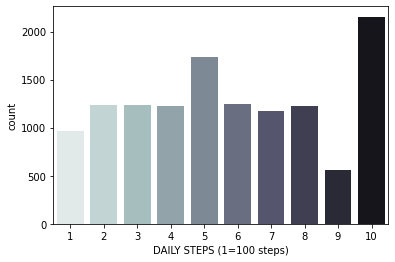

In [ ]:
# Visualization of steps people walk daily
print("BAR PLOT OF DAILY_STEPS:\n")
l = sns.countplot(x='DAILY_STEPS',data=df,palette='bone_r')
plt.xlabel('DAILY STEPS (1=100 steps)')
plt.show()

BAR PLOT OF SUFFICIENT INCOME:



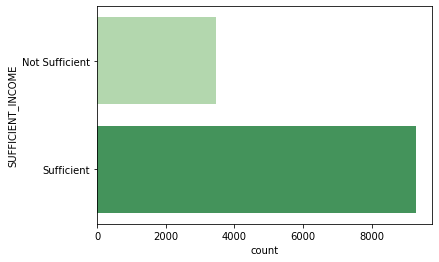

In [ ]:
# Visualization of sufficiency of income
print("BAR PLOT OF SUFFICIENT INCOME:\n")
m = sns.countplot(y='SUFFICIENT_INCOME',data=df,palette='Greens',)

BAR PLOT OF DAILY INTAKE OF FRUITS & VEGITABLES:



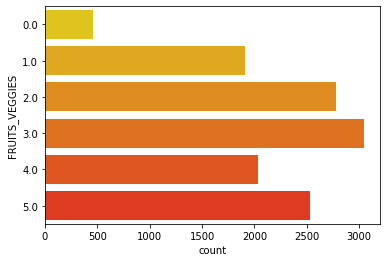

In [ ]:
# Visualization of fruits & vegitables people eat in a day
print("BAR PLOT OF DAILY INTAKE OF FRUITS & VEGITABLES:\n")
n = sns.countplot(y='FRUITS_VEGGIES',data=df,palette='autumn_r')

BAR PLOT OF TIME_FOR_PASSION:



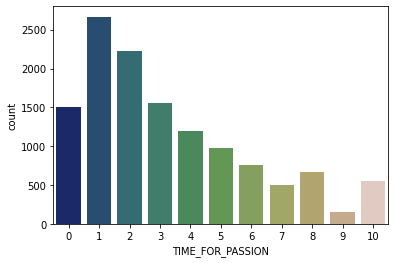

In [ ]:
# Visualization of time people spend on their passion
print("BAR PLOT OF TIME_FOR_PASSION:\n")
p = sns.countplot(x='TIME_FOR_PASSION',data=df,palette='gist_earth')

BAR PLOT OF SOCIAL_NETWORK:



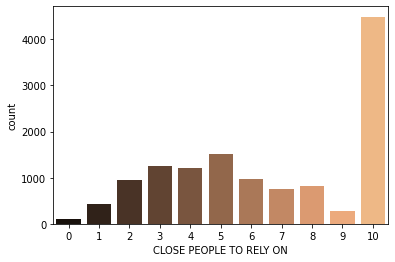

In [ ]:
# Visualization of social network of people
print("BAR PLOT OF SOCIAL_NETWORK:\n")
q = sns.countplot(x='SOCIAL_NETWORK',data=df,palette='copper')
plt.xlabel('CLOSE PEOPLE TO RELY ON')
plt.show()

BAR PLOT OF DAILY_MEDITATION:



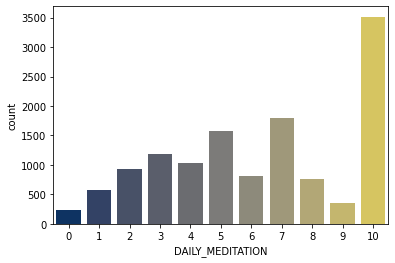

In [ ]:
# Visualization of time people spend in reflection, meditation etc.
print("BAR PLOT OF DAILY_MEDITATION:\n")
r = sns.countplot(x='DAILY_MEDITATION',data=df,palette='cividis')

BAR PLOT OF SLEEP HOURS:



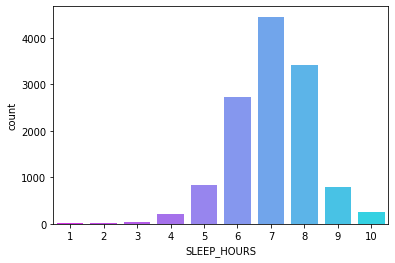

In [ ]:
# Visualization of hours people sleep daily
print("BAR PLOT OF SLEEP HOURS:\n")
x = sns.countplot(x='SLEEP_HOURS',data=df,palette='cool_r')

BAR PLOT OF DAILY STRESS


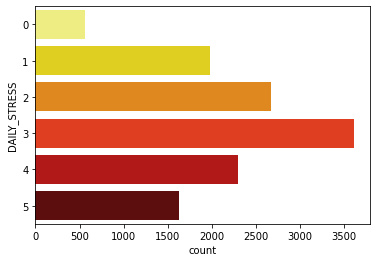

In [ ]:
# Visualization of day to day stress people experience.
print("BAR PLOT OF DAILY STRESS")
y = sns.countplot(y='DAILY_STRESS',data=df,palette='hot_r')

BAR PLOT OF BMI_RANGE:



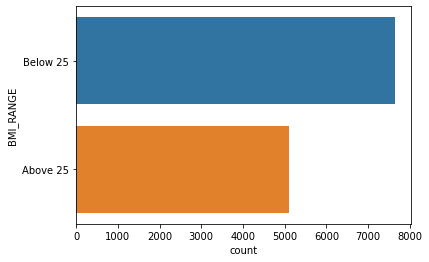

In [ ]:
# Visualization of Body-Mass-Index range that people fall into
print("BAR PLOT OF BMI_RANGE:\n")
z = sns.countplot(y='BMI_RANGE',data=df)

BMI WITH FRUITS & VEGETABLES INTAKE SEGREGATED BY GENDER:



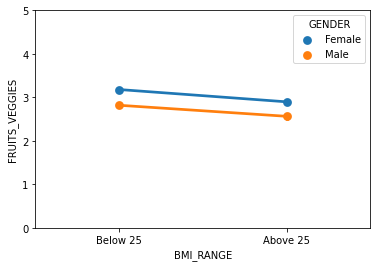

In [ ]:
# BMI_RANGE with FRUITS_VEGGIES
print("BMI WITH FRUITS & VEGETABLES INTAKE SEGREGATED BY GENDER:\n")
a = (sns.pointplot(x='BMI_RANGE',y='FRUITS_VEGGIES',
                    hue='GENDER',data=df))
a.set(ylim=(0,5))
plt.show()

As can be seen above, people who eat more fruits and veggies have lower BMI. Although the difference seems negligible.

BMI WITH DAILY STEPS SEGREGATED BY GENDER:



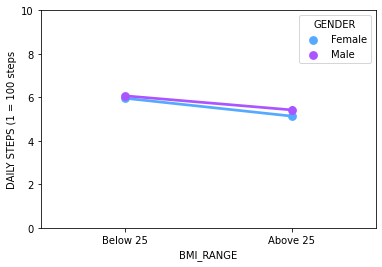

In [ ]:
# BMI_RANGE with DAILY_STEPS
print("BMI WITH DAILY STEPS SEGREGATED BY GENDER:\n")
b = (sns.pointplot(x='BMI_RANGE',y='DAILY_STEPS',data=df,
               hue='GENDER',colour='red',palette='cool'))
b.set(ylim=(0,10))
plt.ylabel('DAILY STEPS (1 = 100 steps')
plt.show()

As can be seen above, both men and women have lower BMI when they take more steps daily. Although the difference is about 100 steps, which is a  small difference.

CORRELATION b/w DAILY STRESS & DAILY MEDITATION:



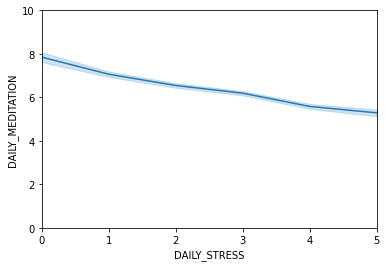

,DAILY_STRESS,DAILY_MEDITATION
DAILY_STRESS,1.000000,-0.214701
DAILY_MEDITATION,-0.214701,1.000000


In [ ]:
# DAILY_STRESS with DAILY_MEDITATION
print("CORRELATION b/w DAILY STRESS & DAILY MEDITATION:\n")
c = sns.lineplot(x='DAILY_STRESS',y='DAILY_MEDITATION',data=df)
c.set(xlim=(0,5))
c.set(ylim=(0,10))
plt.show()
df1 = df.loc[:,('DAILY_STRESS','DAILY_MEDITATION')]
df1.corr(method='pearson')

As can be seen above, there is a moderate negative correlation of -21.47% between day to day experience of stress and time spend on reflections, meditation, etc.

CORRELATION b/w DAILY STRESS & SOCIAL NETWORK


,DAILY_STRESS,SOCIAL_NETWORK
DAILY_STRESS,1.000000,0.012873
SOCIAL_NETWORK,0.012873,1.000000


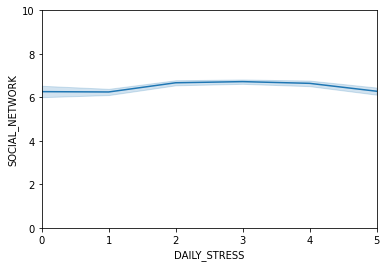

In [ ]:
# DAILY_STRESS with SOCIAL_NETWORK
print('CORRELATION b/w DAILY STRESS & SOCIAL NETWORK')
d = sns.lineplot(x='DAILY_STRESS',y='SOCIAL_NETWORK',data=df)
d.set(xlim=(0,5))
d.set(ylim=(0,10))
df2 = df.loc[:,('DAILY_STRESS','SOCIAL_NETWORK')]
df2.corr(method='pearson')

As can be seen above, there is virtually no correlation between day to day experience of stress and network of close relationships.

,DAILY_STRESS,SLEEP_HOURS
DAILY_STRESS,1.000000,-0.152615
SLEEP_HOURS,-0.152615,1.000000


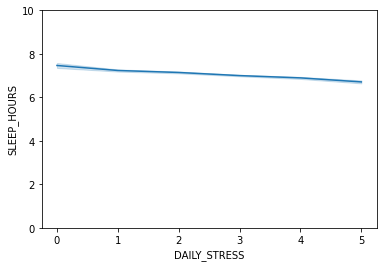

In [ ]:
# DAILY_STRESS with SLEEP_HOURS
e = sns.lineplot(x='DAILY_STRESS',y='SLEEP_HOURS',data=df)
e.set(ylim=(0,10))
df3 = df.loc[:,('DAILY_STRESS','SLEEP_HOURS')]
df3.corr(method='pearson')

As can be seen above, there is a small negative correlation of -15.26% between day to day experience of stress and daily sleeping hours.

INCOME AND TIME SPEND FOLLOWING PASSION:



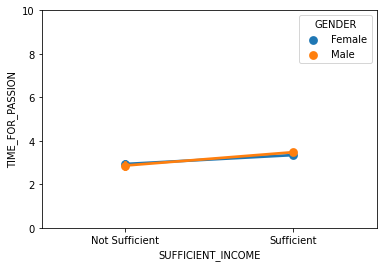

In [ ]:
# SUFFICIENT_INCOME with TIME_FOR_PASSION
print('INCOME AND TIME SPEND FOLLOWING PASSION:\n')
f = (sns.pointplot(x='SUFFICIENT_INCOME',y='TIME_FOR_PASSION',
                   hue='GENDER',data=df))
f.set(ylim=(0,10))
plt.show()

As can be seen above, people who have sufficient income, also get to have more time for following passion. But here again the difference seems very small to be of any interest.

**CONCLUSION**

---



*    People who eat more fruits and veggies have lower BMI, but the difference is negligible.
*    People have lower BMI when they take more steps daily, but the difference is about 100 steps, which is small.
*   There is a moderate negative correlation of -21.47% between day to day experience of stress and time spend on reflections, meditation, etc.
*   There is virtually no correlation between day to day experience of stress and network of close relationships.
*    There is a small negative correlation of -15.26% between day to day experience of stress and daily sleeping hours.
*   People who have sufficient income, also get to have more time for following passion. But difference seems very small to be of any interest.








